# Networks and their Structure: Network Science

## Modelling Networks

Preamble: it is helpful to use models to study real networks, but we need to consider whether our models have the same features as real networks.

One simple feature of a network is the degrees of the nodes.  The degree of a node is just the number of incident links --- one can also think of in-degree and out-degree if the links are directed either towards or away from the node.  We will look at the degrees of a real network and of a simple model.

We will define graphs as dictionaries where the keys are the nodes and the
values are sets containing all neighbours.  Here is an example digraph (we
can define graphs in the same way --- just need to ensure symmetry)

In [1]:
EXAMPLE = {0: set([1, 4, 5, 8]),
           1: set([4, 6]),
           2: set([3, 7, 9]),
           3: set([7]),
           4: set([2]),
           5: set([1]),
           6: set([]),
           7: set([3]),
           8: set([1, 2]),
           9: set([0 ,3, 4, 5, 6, 7])}

So the definition gives us the edges going *out* from each vertex.  We can immediately compute the edges going in.

In [2]:
def compute_in_degrees(digraph):
    """Takes a directed graph and computes the in-degrees for the nodes in the
    graph. Returns a dictionary with the same set of keys (nodes) and the
    values are the in-degrees."""
    #initialize in-degrees dictionary with zero values for all vertices
    in_degree = {}
        
    for vertex in digraph:
        in_degree[vertex] = 0
    #consider each vertex
    for vertex in digraph:
        #amend in_degree[w] for each outgoing edge from v to w
        for neighbour in digraph[vertex]:
            in_degree[neighbour] += 1
    return in_degree

What is the in-degree of node 3?

In [3]:
in_degree = compute_in_degrees(EXAMPLE)

In [4]:
in_degree[3]

3

How many nodes have in-degree 1?

In [5]:
deg1 = [v for v in EXAMPLE if in_degree[v]==1]
print(len(deg1))

3


We will be interested in the distribution of in-degrees so here is some code to find that.

In [6]:
def in_degree_distribution(digraph):
    """Takes a directed graph and computes the unnormalized distribution of the
    in-degrees of the graph.  Returns a dictionary whose keys correspond to
    in-degrees of nodes in the graph and values are the number of nodes with
    that in-degree. In-degrees with no corresponding nodes in the graph are not
    included in the dictionary."""
    #find in_degrees
    in_degree = compute_in_degrees(digraph)
    #initialize dictionary for degree distribution
    degree_distribution = {}
    #consider each vertex
    for vertex in in_degree:
        #update degree_distribution
        if in_degree[vertex] in degree_distribution:
            degree_distribution[in_degree[vertex]] += 1
        else:
            degree_distribution[in_degree[vertex]] = 1
    return degree_distribution

In [7]:
dd = in_degree_distribution(EXAMPLE)

In [8]:
print(dd)

{1: 3, 3: 4, 2: 3}


We are going to analyze the structure of graphs generated by citation patterns from scientific papers. 

Each scientific paper cites many other papers.  The question is: are the cited papers chosen randomly or is there some "hidden pattern"? (Well, obviously they're not chosen randomly, but can we tell that just by looking at network structure.)

We represent the citation data as a directed graph (a citation graph) in which the nodes correspond to papers, and there is an edge from node $i$ to node $j$ if the paper corresponding to node $i$ cites the paper corresponding to node $j$.

As we're interested in understanding how papers get cited, we analyze the in-degree distribution of a specific graph.  Then we will, eventually, contrast it to those of graphs generated by two different random processes. 

A citation network is given in the file alg_phys-cite.txt.  Each line of the file corresponds to a paper.  The first item is an identifier for the paper.  The others are identifiers for the papers that it cites.  Save the file in the same directory as this notebook.

The code below loads a file and creates the network as a digraph

In [9]:
def load_graph(graph_txt):
    """
    Loads a graph from a text file.
    Then returns the graph as a dictionary.
    """
    graph = open(graph_txt)
    
    answer_graph = {}
    nodes = 0
    for line in graph:
        neighbors = line.split(' ')
        node = int(neighbors[0])
        answer_graph[node] = set([])
        for neighbor in neighbors[1 : -1]:
            answer_graph[node].add(int(neighbor))
        nodes += 1
    print ("Loaded graph with", nodes, "nodes")
    
    return answer_graph

So let's apply it to the citation data.

In [10]:
citation_graph = load_graph("alg_phys-cite.txt")

Loaded graph with 27770 nodes


Let's combine everything: create objects called citation_in_degrees and citation_distribution that describe the nodes' in-degrees and the in-degree distribution of the citations network.

In [11]:
citation_in_degrees = compute_in_degrees(citation_graph)

In [12]:
citation_distribution = in_degree_distribution(citation_graph)

How many papers are cited just once?  Which paper is cited the most and how many times is it cited?

In [13]:
print(citation_distribution[1])

3787


In [14]:
most_cited = max(citation_in_degrees, key=lambda k: citation_in_degrees[k])

In [15]:
citation_in_degrees[most_cited]

2414

Distributions are easier to consider visually.

First note that working with normalized distributions is better (so we can compare networks of different sizes).

The code below creates a plot of the distribution (and saves it as citations.png).

<function matplotlib.pyplot.show(*args, **kw)>

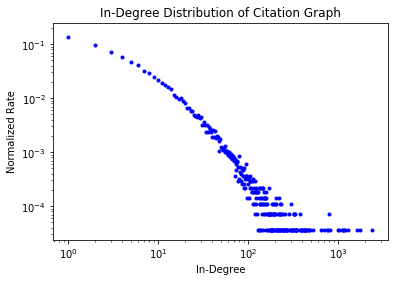

In [17]:
normalized_citation_distribution = {}
for degree in citation_distribution:
    normalized_citation_distribution[degree] = citation_distribution[degree] / 27770.0

#create arrays for plotting
xdata = []
ydata = []
for degree in normalized_citation_distribution:
    xdata += [degree]
    ydata += [normalized_citation_distribution[degree]]
    
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

#plot degree distribution 
plt.xlabel('In-Degree')
plt.ylabel('Normalized Rate')
plt.title('In-Degree Distribution of Citation Graph')
plt.loglog(xdata, ydata, marker='.', linestyle='None', color='b')
plt.savefig('citations.png')
plt.rcParams["figure.figsize"] = (10,10)
plt.show

Look at the plot (note the logarithmic scale).  This, in essence, provides a signature of the network.  So if we have a network model that we claim we can use to investigate this kind of network, then it should have a similar distribution.